In [150]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [151]:
df = pd.read_csv('framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

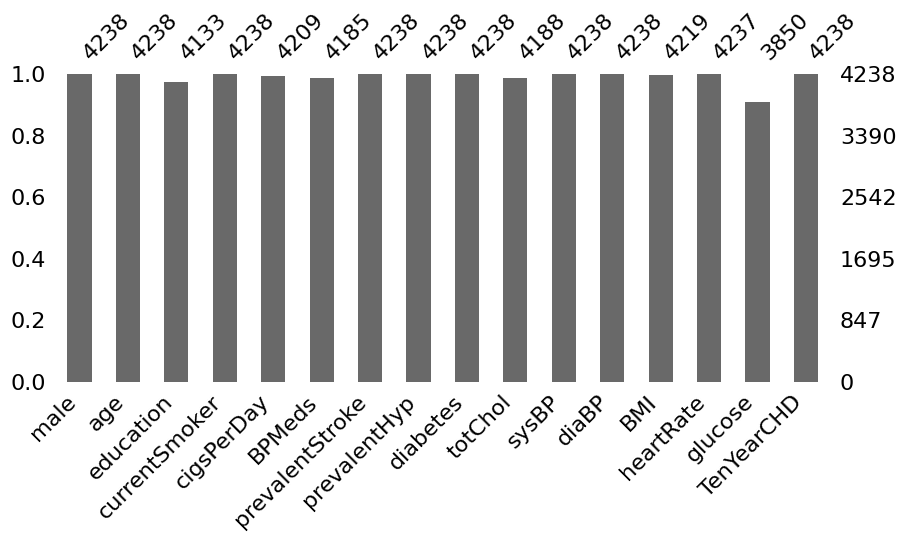

In [153]:
msno.bar(df, figsize = (10, 4))

In [154]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


##### Tratando dados NaN das colunas cigsPerDay e education

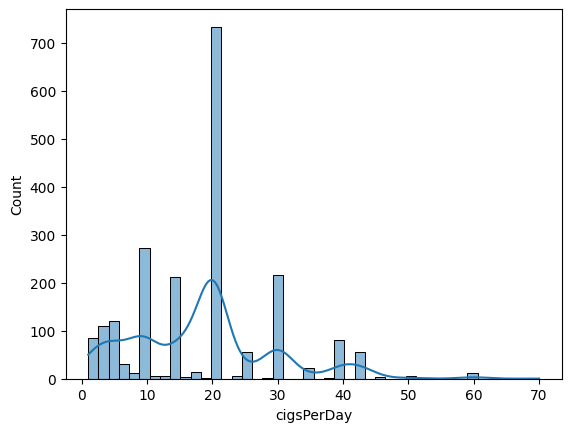

In [155]:
df_smoker = df[(df['currentSmoker'] == 1)]
sns.histplot(df_smoker, x = 'cigsPerDay', kde = True);

In [156]:
# print(df[(df['cigsPerDay'] == 0) & (df['BPMeds'] == 1)])
df_cigsperday_nan = df[(df['cigsPerDay'].isna())]
print(df_cigsperday_nan['currentSmoker'].unique()) # Os dados NaN na colunas cigsPerDay é referente somente a fumantes.

[1]


In [157]:
df = df.dropna(subset = ['cigsPerDay', 'education']).reset_index(drop = True) # Mais indicado o dropna por ser um pequeno grupo de dados NaN
df.shape

(4106, 16)

##### Tratando dados NaN das colunas totChol e BMI

In [158]:
df.corr() # total de colesterol (totChol) e índice de massa corporal (BMI) possuem poucos dados, não possui relevancia no modelo e não possuem corr com nenhuma outra variável preditora para tentar tratar os dados NaN.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027448,0.016209,0.200370,0.322086,-0.052398,-0.004262,0.006325,0.017836,-0.071493,-0.034107,0.059133,0.080487,-0.116457,0.004578,0.084565
age,-0.027448,1.000000,-0.165723,-0.212968,-0.192461,0.126140,0.058788,0.309358,0.101308,0.268451,0.394907,0.208745,0.136072,-0.010695,0.121065,0.229005
education,0.016209,-0.165723,1.000000,0.018272,0.008085,-0.010786,-0.035195,-0.082299,-0.038745,-0.023416,-0.130609,-0.063425,-0.137630,-0.054759,-0.035327,-0.054866
currentSmoker,0.200370,-0.212968,0.018272,1.000000,0.770367,-0.048021,-0.033109,-0.105824,-0.040231,-0.048701,-0.131359,-0.110482,-0.163361,0.056606,-0.057257,0.018074
cigsPerDay,0.322086,-0.192461,0.008085,0.770367,1.000000,-0.046214,-0.033281,-0.069527,-0.034928,-0.026092,-0.090378,-0.056606,-0.089780,0.071794,-0.057635,0.054110
BPMeds,-0.052398,0.126140,-0.010786,-0.048021,-0.046214,1.000000,0.118734,0.261630,0.044883,0.084908,0.256598,0.195680,0.101453,0.017837,0.053093,0.091486
prevalentStroke,-0.004262,0.058788,-0.035195,-0.033109,-0.033281,0.118734,1.000000,0.075801,0.007000,0.000280,0.057782,0.046014,0.026726,-0.018119,0.018804,0.062608
prevalentHyp,0.006325,0.309358,-0.082299,-0.105824,-0.069527,0.261630,0.075801,1.000000,0.076211,0.166664,0.696395,0.616141,0.300570,0.150176,0.089051,0.179955
diabetes,0.017836,0.101308,-0.038745,-0.040231,-0.034928,0.044883,0.007000,0.076211,1.000000,0.041253,0.110238,0.049755,0.083458,0.046799,0.617550,0.097576
totChol,-0.071493,0.268451,-0.023416,-0.048701,-0.026092,0.084908,0.000280,0.166664,0.041253,1.000000,0.212360,0.169521,0.117466,0.087541,0.049409,0.085020


In [159]:
df = df.dropna(subset = ['totChol', 'BMI']).reset_index(drop = True)
df ### 400 linhas a mais que no modelo_v1, um aumento de ~10% na dataset.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4036,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4037,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4038,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna BPMeds

In [160]:
df_bpmeds = df[(df['BPMeds'].isna())]
df_bpmeds.shape

(52, 16)

In [161]:
print(df[(df['prevalentHyp'] == 0) & (df['BPMeds'] == 1)])

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [162]:
for index in df[(df['BPMeds'].isna()) & (df['prevalentHyp'] == 0)].index:
    df.at[df.index[index], 'BPMeds'] = 0
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4036,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4037,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4038,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [163]:
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 1)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 1)]).shape)
# Não foi encontrado regras, e é um tiro no escuro tenta definir entre sim ou não, e muito arriscado, e como são poucos dados NaN (22), não pesa no modelo então podemos excluir

(39, 16)
(262, 16)
(856, 16)
(78, 16)


In [164]:
df = df.dropna(subset = ['BPMeds']).reset_index(drop = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4014,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4015,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4016,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna heartRate

In [165]:
df_heartRate = df[(df['heartRate'].isna())]
df_heartRate

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [166]:
media_heartRate = df[(df['TenYearCHD'] == 1) & (df['male'] == 1) & (df['currentSmoker'] == 1) & (df['prevalentStroke'] == 0) & (df['prevalentHyp'] == 1) & (df['diabetes'] == 0)]
media_heartRate = (media_heartRate['heartRate'].mean()).round(1)
media_heartRate

np.float64(80.3)

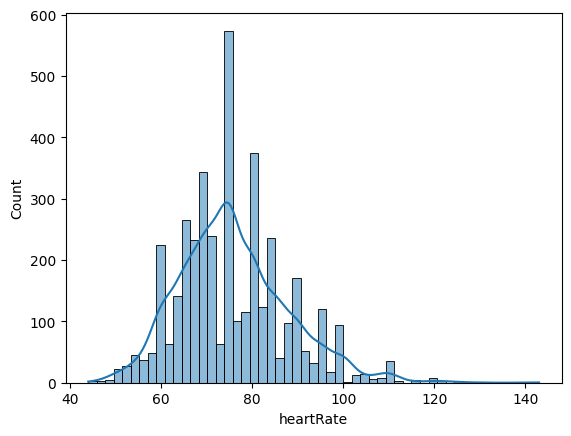

In [167]:
sns.histplot(df, x = 'heartRate', kde = True);

In [168]:
df.at[df.index[659], 'heartRate'] =  media_heartRate
df[df.index == 659]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,80.3,91.0,1


##### Tratando dados NaN da coluna glucose

In [169]:
df_glucose = df[(df['glucose'].isna())]
df_glucose.shape

(332, 16)

(565, 16) (35, 16) (3351, 16) (67, 16)


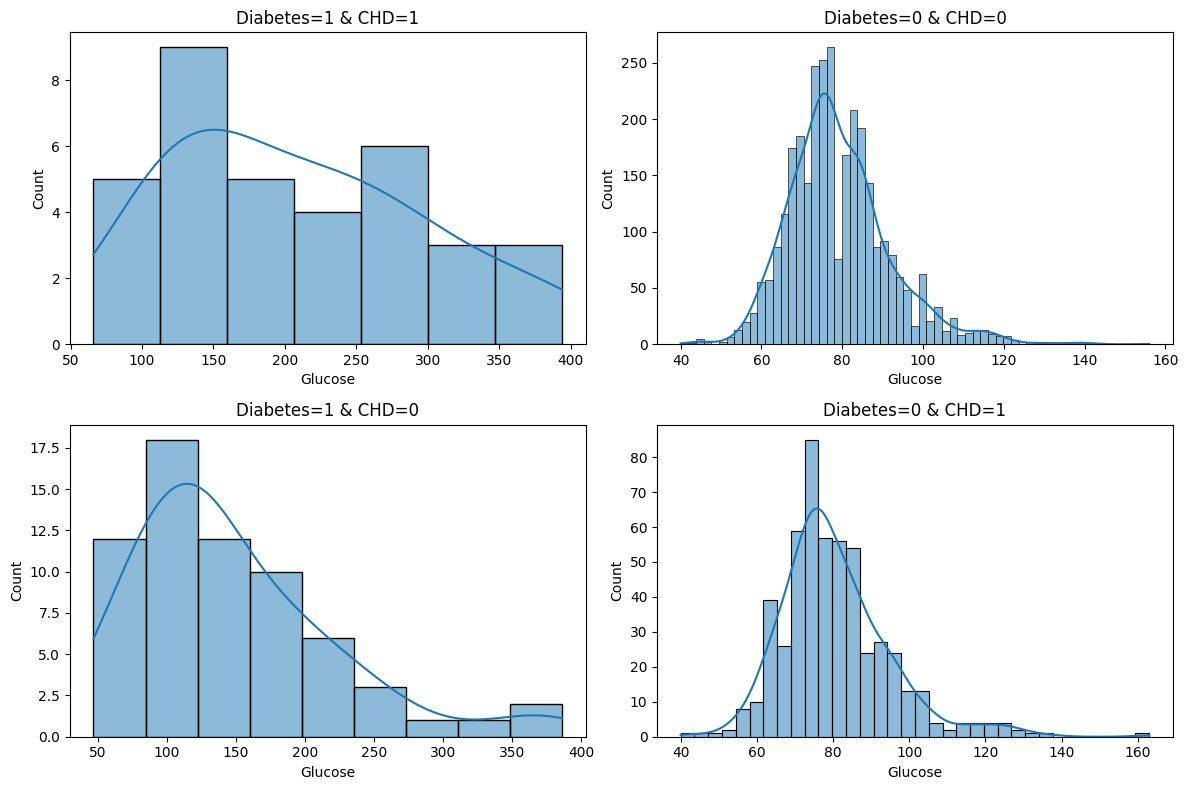

In [170]:
media_diabete1_chd1 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 1)]
media_diabete0_chd0 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 0)]
media_diabete1_chd0 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 0)]
media_diabete0_chd1 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 1)]
print(media_diabete0_chd1.shape, media_diabete1_chd1.shape, media_diabete0_chd0.shape, media_diabete1_chd0.shape)

dfs_media = [
    media_diabete1_chd1,
    media_diabete0_chd0,
    media_diabete1_chd0,
    media_diabete0_chd1
]
titles = [
    'Diabetes=1 & CHD=1',
    'Diabetes=0 & CHD=0',
    'Diabetes=1 & CHD=0',
    'Diabetes=0 & CHD=1'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df_media, title) in enumerate(zip(dfs_media, titles)):
    sns.histplot(df_media['glucose'], ax = axes[i], kde = True)
    axes[i].set_title(title)
    axes[i].set_xlabel('Glucose')

plt.tight_layout()
plt.show()

In [171]:
media_diabete1_chd1 = (media_diabete1_chd1['glucose'].median()).round(1)
media_diabete0_chd0 = (media_diabete0_chd0['glucose'].mean()).round(1)
media_diabete1_chd0 = (media_diabete1_chd0['glucose'].median()).round(1)
media_diabete0_chd1 = (media_diabete0_chd1['glucose'].mean()).round(1)

print(media_diabete1_chd1, media_diabete0_chd0, media_diabete1_chd0, media_diabete0_chd1)

for i in df[df['glucose'].isna()].index:
    diabete = df.at[df.index[i], 'diabetes']
    chd = df.at[df.index[i], 'TenYearCHD']

    if diabete == 1 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete1_chd1
    elif diabete == 1 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd1

206.0 79.2 126.0 80.6


In [172]:
print(df.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


##### Dados de treino e teste

In [173]:
var_target = 'TenYearCHD'
x = df.drop(columns = [f'{var_target}'])#.to_numpy()
y = df[f'{var_target}']#.to_numpy()

In [174]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(3214, 15) (804, 15) (3214,) (804,)


##### Balanceando os dados

In [175]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC

In [176]:
print(x_treino.shape, y_treino.shape)
print(y_treino.value_counts())

(3214, 15) (3214,)
TenYearCHD
0    2733
1     481
Name: count, dtype: int64


In [177]:
categorical_features = [0, 2, 3, 5, 6, 7, 8]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state = 42)
x_treino2, y_treino2 = smote_nc.fit_resample(x_treino, y_treino)

In [178]:
y_treino2.value_counts()

TenYearCHD
1    2733
0    2733
Name: count, dtype: int64

In [179]:
x_treino2['education'] = x_treino2['education'].astype(int)
x_treino2['BPMeds'] = x_treino2['BPMeds'].astype(int)

In [180]:
for coluna in x_treino2.columns:
    if x_treino2[coluna].dtype == np.float64:
        x_treino2[coluna] = x_treino2[coluna].round(2)

x_treino2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,47,2,1,20.00,0,0,1,1,296.00,141.00,93.00,28.50,68.00,332.00
1,1,40,1,1,20.00,0,0,0,0,201.00,121.50,76.50,29.38,74.00,94.00
2,1,48,2,0,0.00,0,0,0,0,165.00,115.00,80.00,26.79,75.00,78.00
3,0,51,2,0,0.00,0,0,1,0,206.00,146.00,77.00,23.58,87.00,90.00
4,1,51,1,1,9.00,0,0,0,0,255.00,115.00,67.00,26.97,83.00,58.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,0,66,1,0,0.00,0,0,1,0,296.27,144.71,93.72,28.60,85.73,81.27
5462,0,61,1,0,0.00,0,0,1,0,289.27,246.97,128.46,32.61,90.87,88.04
5463,0,61,3,0,0.00,0,0,1,0,313.76,201.75,117.02,25.05,66.22,86.78
5464,1,61,4,0,0.00,0,0,0,0,205.74,125.13,81.85,27.83,63.41,77.13


##### Normalizando os dados

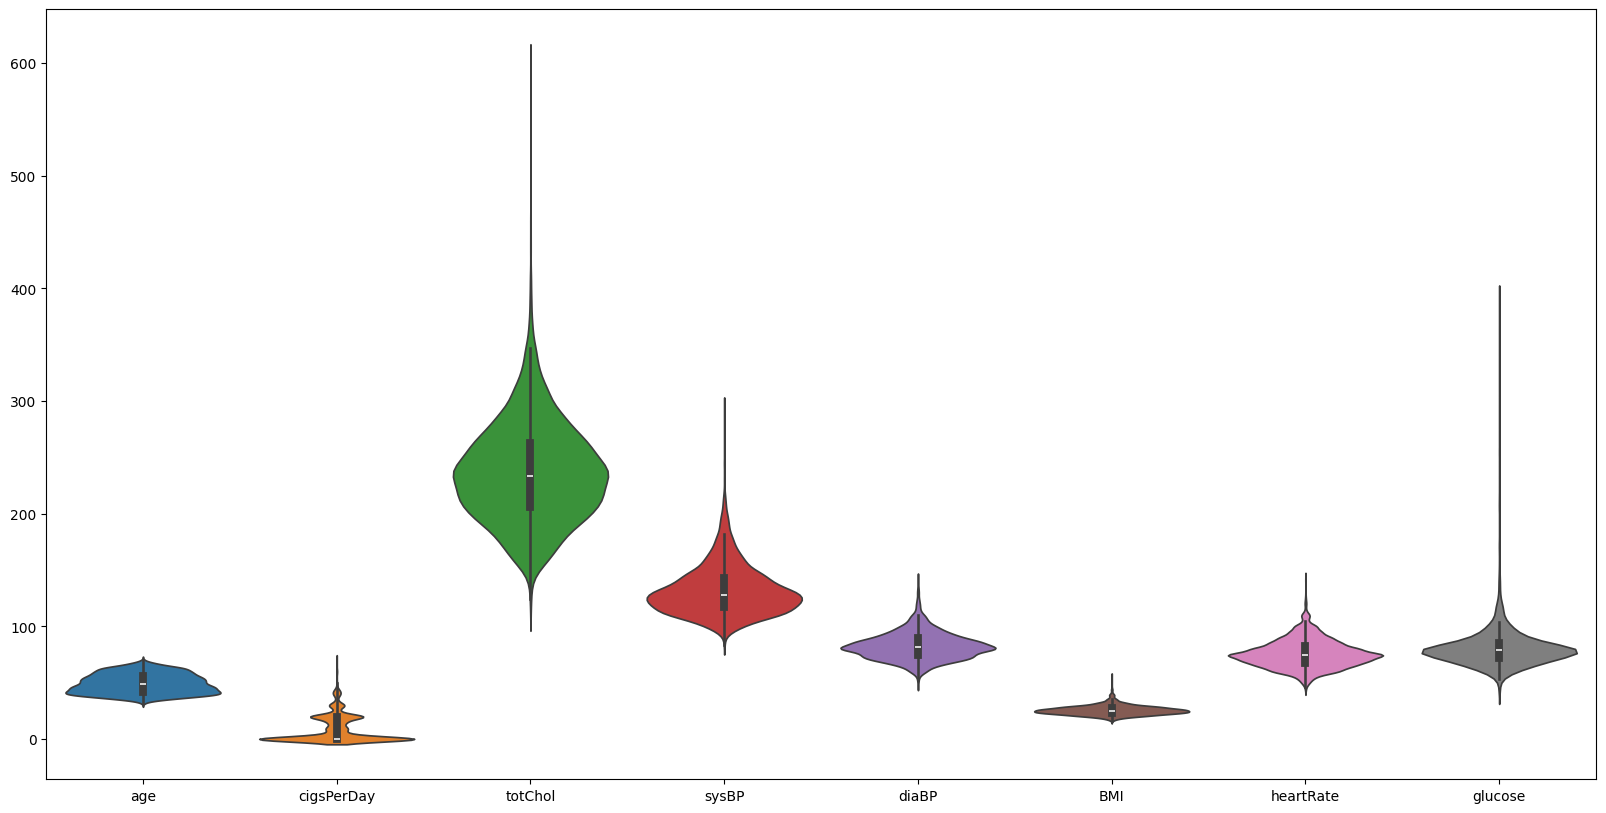

In [181]:
df_boxplot = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
plt.figure(figsize = (20, 10))
# sns.boxplot(df_boxplot);
sns.violinplot(df_boxplot);

In [182]:
# robust_cols = ['totChol', 'glucose', 'sysBP', 'heartRate']
# standard_cols = ['age', 'BMI', 'diaBP', 'cigsPerDay', 'education']

# robust_scaler = RobustScaler()
# standard_scaler = StandardScaler()

# x_treino2 = x_treino2.copy()

# x_treino2[robust_cols] = robust_scaler.fit_transform(x_treino2[robust_cols])
# x_treino2[standard_cols] = standard_scaler.fit_transform(x_treino2[standard_cols])

standar_scaler = StandardScaler()
x_treino2 = standar_scaler.fit_transform(x_treino2)
x_treino2 = pd.DataFrame(x_treino2)
x_treino2.columns = x_treino.columns
x_treino2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.054928,-0.512767,0.236262,1.041092,0.870960,-0.131563,-0.0606,1.270949,6.213590,1.296491,0.174683,0.649077,0.633055,-0.658753,9.483298
1,1.054928,-1.358363,-0.783004,1.041092,0.870960,-0.131563,-0.0606,-0.786814,-0.160938,-0.878778,-0.633429,-0.643334,0.859423,-0.140628,0.419695
2,1.054928,-0.391968,0.236262,-0.960530,-0.788004,-0.131563,-0.0606,-0.786814,-0.160938,-1.703090,-0.902800,-0.369186,0.193180,-0.054273,-0.189623
3,-0.947932,-0.029570,0.236262,-0.960530,-0.788004,-0.131563,-0.0606,1.270949,-0.160938,-0.764290,0.381891,-0.604170,-0.632549,0.981978,0.267365
4,1.054928,-0.029570,-0.783004,1.041092,-0.041470,-0.131563,-0.0606,-0.786814,-0.160938,0.357691,-0.902800,-1.387450,0.239483,0.636561,-0.951270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,-0.947932,1.782420,-0.783004,-0.960530,-0.788004,-0.131563,-0.0606,1.270949,-0.160938,1.302674,0.328431,0.705474,0.658778,0.872308,-0.065094
5462,-0.947932,1.178423,-0.783004,-0.960530,-0.788004,-0.131563,-0.0606,1.270949,-0.160938,1.142391,4.566253,3.426587,1.690297,1.316169,0.192724
5463,-0.947932,1.178423,1.255529,-0.960530,-0.788004,-0.131563,-0.0606,1.270949,-0.160938,1.703152,2.692262,2.530515,-0.254411,-0.812464,0.144740
5464,1.054928,1.178423,2.274795,-0.960530,-0.788004,-0.131563,-0.0606,-0.786814,-0.160938,-0.770243,-0.482996,-0.224279,0.460706,-1.055119,-0.222755


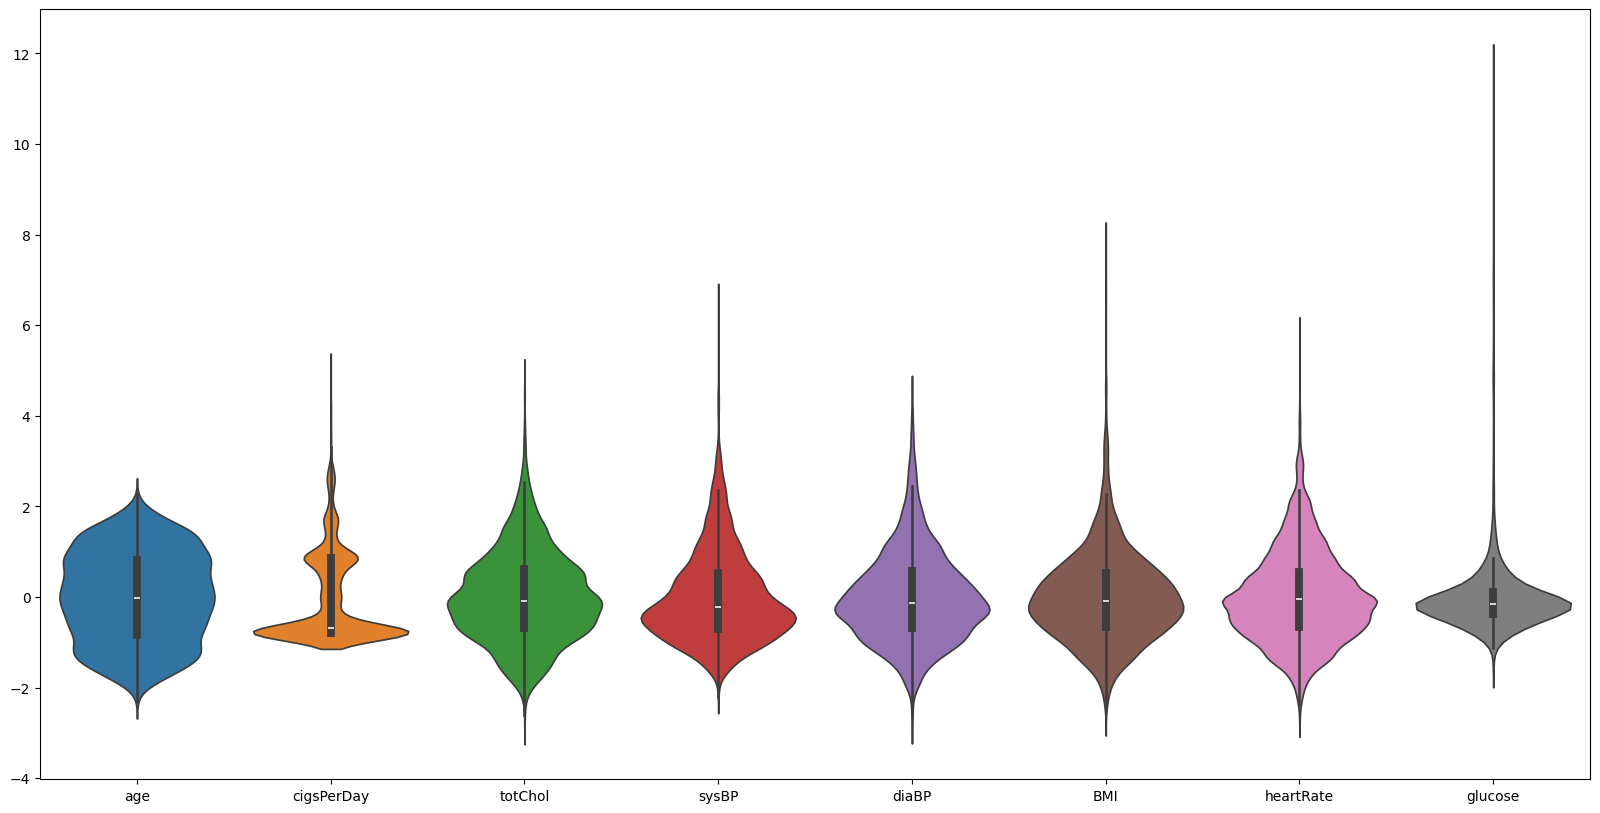

In [183]:
df_boxplot2 = x_treino2[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
plt.figure(figsize = (20, 10))
# sns.boxplot(df_boxplot2);
sns.violinplot(df_boxplot2);

##### Rodando o Modelo²

In [184]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000)

In [185]:
coef = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.203618
age,0.500057
education,-0.446245
currentSmoker,-0.098667
cigsPerDay,0.328231
BPMeds,-0.208986
prevalentStroke,-0.058382
prevalentHyp,0.056101
diabetes,-0.130079
totChol,0.094939


In [186]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.6825832418587633 0.1480099502487562


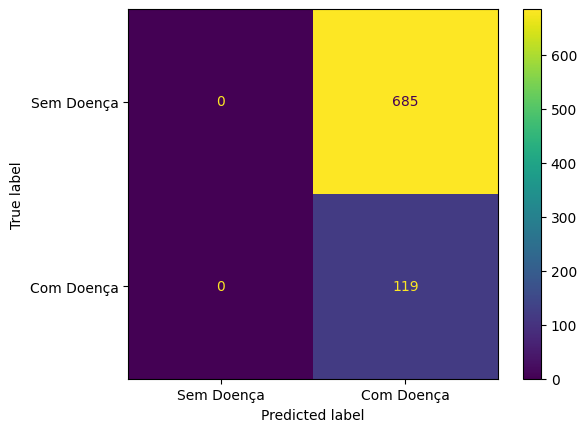

In [187]:
y_pred3 = clf.predict(x_teste)
cm = metrics.confusion_matrix(y_teste, y_pred3)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [188]:
recall = metrics.recall_score(y_teste, y_pred3)
f1_score = metrics.f1_score(y_teste, y_pred3)
print(recall, f1_score)

1.0 0.25785482123510295


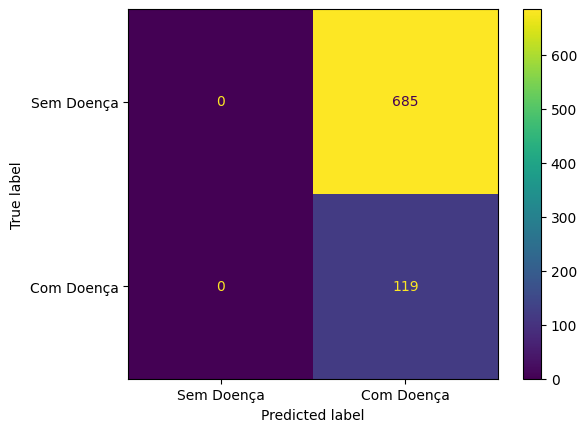

In [194]:
y_probs2 = clf.predict_proba(x_teste)[:, 1]

threshold = 0.18
y_pred4 = (y_probs2 >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred4)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [190]:
recall = metrics.recall_score(y_teste, y_pred4)
f1_score = metrics.f1_score(y_teste, y_pred4)
print(recall, f1_score)

1.0 0.25785482123510295


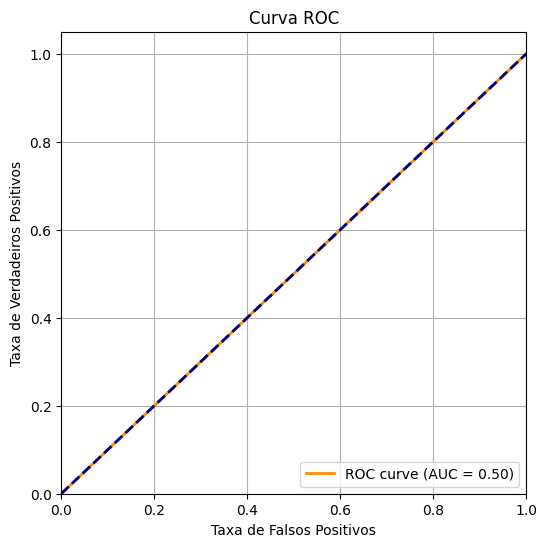

In [191]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs2)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()